In [46]:
!pip install numpy pandas seaborn matplotlib wordcloud

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [48]:
df_recipes = pd.read_csv('data/RAW_recipes.csv')

In [49]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


### There are 200k plus recipes in the dataset

In [50]:
df_recipes.shape

(231637, 12)

In [51]:
def split_row(row):
    return pd.Series(row.strip('[').strip(']').split(','))

In [53]:
df_recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df_recipes.nutrition.apply(split_row)

In [54]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [55]:
df_recipes.isna().sum()

name                      1
id                        0
minutes                   0
contributor_id            0
submitted                 0
tags                      0
nutrition                 0
n_steps                   0
steps                     0
description            4979
ingredients               0
n_ingredients             0
calories                  0
total fat (PDV)           0
sugar (PDV)               0
sodium (PDV)              0
protein (PDV)             0
saturated fat (PDV)       0
carbohydrates (PDV)       0
dtype: int64

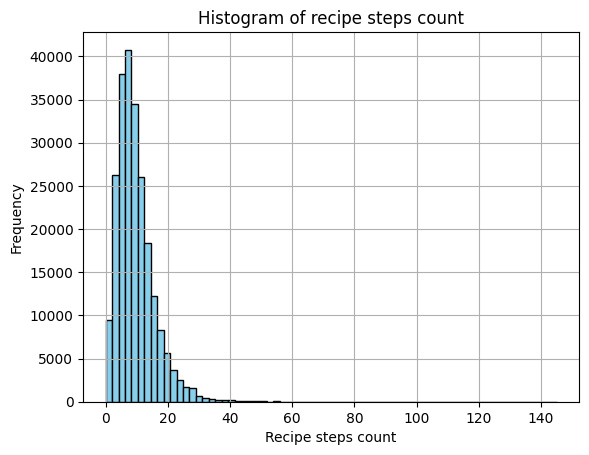

<Figure size 2400x1800 with 0 Axes>

In [56]:
plt.hist(df_recipes['n_steps'], bins=70, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of recipe steps count')  # Add title
plt.xlabel('Recipe steps count')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.figure(figsize=(24, 18))
plt.show()

In [57]:
df_recipes = df_recipes[df_recipes['minutes'] <= 120]

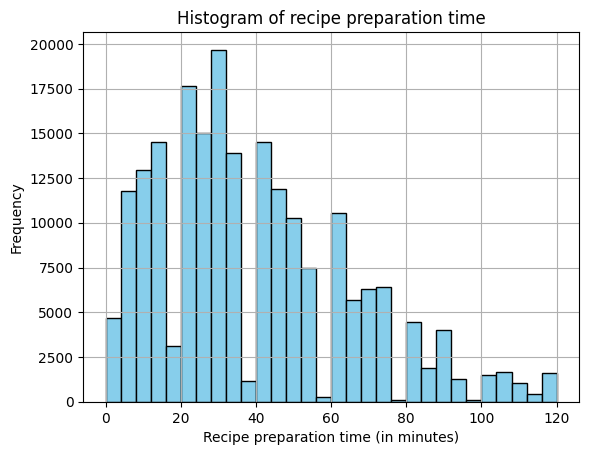

In [58]:

plt.hist(df_recipes['minutes'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of recipe preparation time')  # Add title
plt.xlabel('Recipe preparation time (in minutes)')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

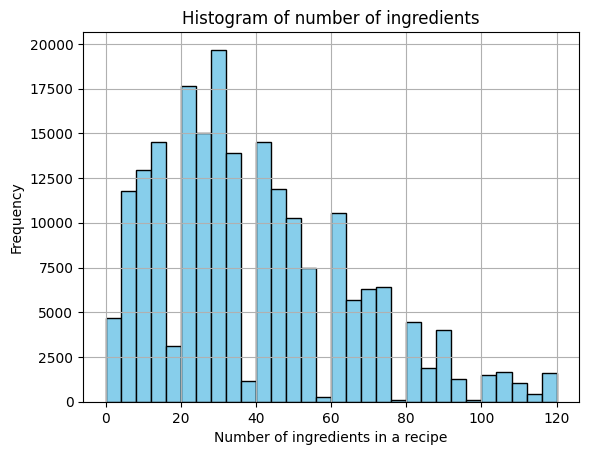

In [59]:

plt.hist(df_recipes['minutes'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of number of ingredients') 
plt.xlabel('Number of ingredients in a recipe')  
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

In [60]:
def split_row_str(row):
    return row.strip('[').strip(']')
wordcloud = WordCloud().generate(','.join(df_recipes['ingredients'].apply(split_row_str)) )

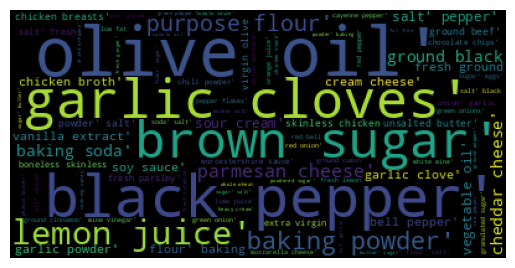

<Figure size 2400x1800 with 0 Axes>

In [61]:
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(24,18))
plt.show()


In [62]:
df_interactions = pd.read_csv('data/RAW_interactions.csv')

In [63]:
df_interactions.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [64]:
df_interactions.shape

(1132367, 5)

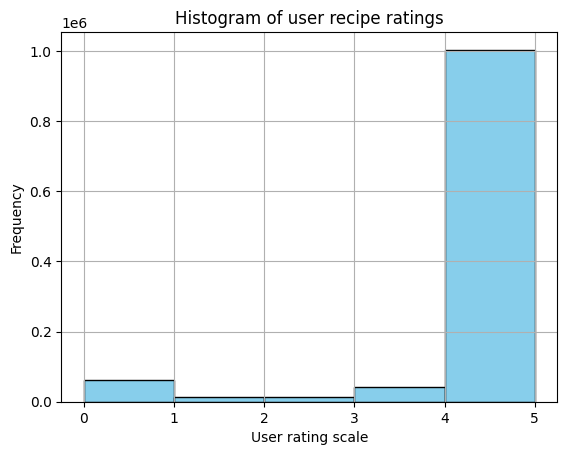

In [65]:
plt.hist(df_interactions['rating'], bins=5, color='skyblue', edgecolor='black')  
plt.title('Histogram of user recipe ratings') 
plt.xlabel('User rating scale')  
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()